In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


classification_model = load_model("best_model.keras")


img_path = '_photo.jpg'  
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  


prediction = classification_model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Tumor Detected (Yes)")
else:
    print("No Tumor Detected (No)")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Tumor Detected (Yes)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


classification_model = load_model("best_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


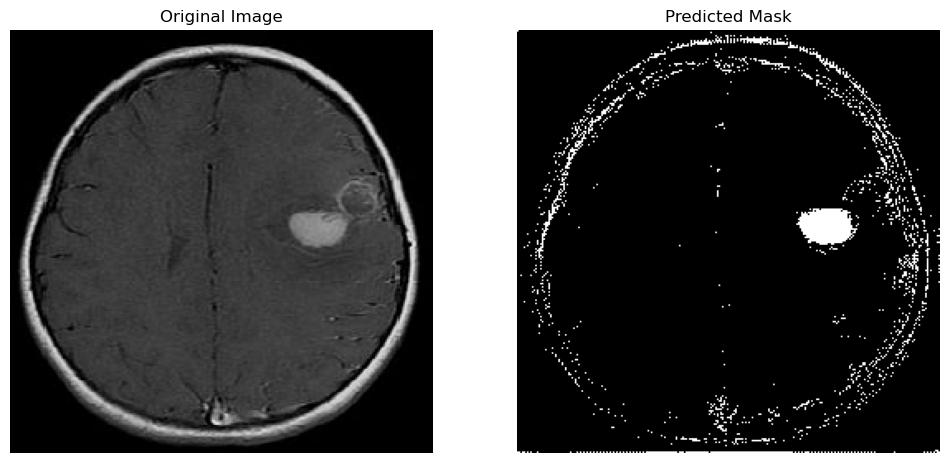

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

segmentation_model = load_model("brain_tumor_segmentation_model.keras", compile=False)

image_path = "_photo.jpg"
image = load_img(image_path, target_size=(256, 256))  
image_array = img_to_array(image) / 255.0
input_image = np.expand_dims(image_array, axis=0)


predicted_mask = segmentation_model.predict(input_image)[0]
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.axis("off")

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

classification_model = load_model("best_model.keras")
segmentation_model = load_model("brain_tumor_segmentation_model.keras", compile=False)
'''''
def prepare_images(image_path):
    original = Image.open(image_path)

    rgb_image_for_classification = original.convert("RGB").resize((224, 224))
    gray_array = img_to_array(rgb_image_for_classification) / 255.0
    gray_array = np.expand_dims(gray_array, axis=0)

    rgb_image = original.convert("RGB").resize((256, 256))
    rgb_array = img_to_array(rgb_image) / 255.0
    rgb_array = np.expand_dims(rgb_array, axis=0)

    return gray_array, rgb_array
'''
def prepare_images(image_path):
    original = Image.open(image_path)

    
    rgb_cls = original.convert("RGB").resize((224, 224))
    cls_array = img_to_array(rgb_cls) / 255.0
    cls_array = np.expand_dims(cls_array, axis=0)

    
    rgb_seg = original.convert("RGB").resize((256, 256))
    seg_array = img_to_array(rgb_seg) / 255.0
    seg_array = np.expand_dims(seg_array, axis=0)

    return cls_array, seg_array


def predict_tumor_classification(image_path):
    gray_input, _ = prepare_images(image_path)
    prediction = classification_model.predict(gray_input)

    if prediction[0][0] > 0.5:
        return "Tumor Detected"
    else:
        return "No Tumor Detected"

def predict_and_visualize_segmentation(image_path, output_dir="static/results"):
    _, rgb_input = prepare_images(image_path)
    predicted_mask = segmentation_model.predict(rgb_input)[0]
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(predicted_mask.squeeze(), cmap='gray')
    ax.axis("off")

    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, os.path.basename(image_path).split('.')[0] + "_predicted_mask.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=200)
    plt.close()

    return output_path

if __name__ == "__main__":
    test_image_path = "_tumor.jpg"

    classification_result = predict_tumor_classification(test_image_path)
    print("Classification Result:", classification_result)

    mask_path = predict_and_visualize_segmentation(test_image_path)
    print("Segmentation mask saved to:", mask_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Result: Tumor Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
Segmentation mask saved to: static/results\_tumor_predicted_mask.png
